In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install lifelines -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 8.5 MB/s eta 0:00:00


In [4]:
TEST_PATH = "/content/drive/MyDrive/1:1_Shriya_Wagholikar/Datasets/experiment_1/exp1_selectKBest_vif_test.csv"

In [5]:
import pandas as pd
test_data = pd.read_csv(TEST_PATH)
test_data.head()

,ASB13,C6orf58,TMEM248,DNAJB12,EN1,FAM114A1,FAM46A,GALNT2,GGCX,GNG12,...,SKI,TCEAL1,TCEAL2,TEF,TMEM194B,TNFRSF11B,TUBGCP2,WISP1,Disease Free (Months),DFS_STATUS_ENCODED
0,-0.1050,2.1691,-0.6761,0.1240,-0.9673,-0.9148,-1.0645,-0.3780,-1.5448,-0.2980,...,-0.4457,0.7045,0.4209,0.6173,-1.0707,-0.5709,1.3146,-0.2024,119.48,1.0
1,-0.5950,-0.2513,-0.2209,1.2554,-0.9815,0.2250,0.7169,0.9993,0.4485,0.2041,...,1.3895,0.1068,0.8163,-0.1429,0.6752,0.0074,0.8986,-0.3668,95.86,0.0
2,0.2187,-1.9452,-0.3263,0.3733,0.2466,0.3526,1.4144,0.3906,1.2149,0.4633,...,0.6493,-0.0159,-0.2995,-1.4228,-0.4799,1.5829,0.3286,-0.5494,16.79,1.0
3,0.5543,1.1511,-0.6104,-0.1870,-0.7498,-0.0701,-1.5171,-1.0341,-1.0295,0.0027,...,-0.0380,0.4263,0.0930,0.9072,-0.8850,-0.2086,0.3464,-0.2734,14.55,0.0
4,0.3029,0.6479,-0.7701,0.5613,-0.5275,-0.1509,0.2339,-0.4920,0.0690,-1.3476,...,-0.7415,-0.4040,0.1320,0.7651,-0.3531,-0.7662,0.7937,0.8867,31.18,0.0


In [6]:
#have loaded the best model from step 3
import pickle
MODEL_PATH = "/content/drive/MyDrive/1:1_Shriya_Wagholikar/Results/experiment_1/best_model_exp1"
with open(MODEL_PATH, 'rb') as f:
    model = pickle.load(f)

In [8]:
#pass test data to model
from lifelines.utils import concordance_index
# Evaluate on the test set
test_predictions = model.predict_partial_hazard(test_data)
test_c_index = concordance_index(test_data['Disease Free (Months)'], -test_predictions, test_data['DFS_STATUS_ENCODED'])
print(f"Test C-index: {test_c_index}")

Test C-index: 0.7026872498570612


Plotting the Risk Score

<Axes: title={'center': 'Risk Score vs Each Individual'}, ylabel='Risk Score'>

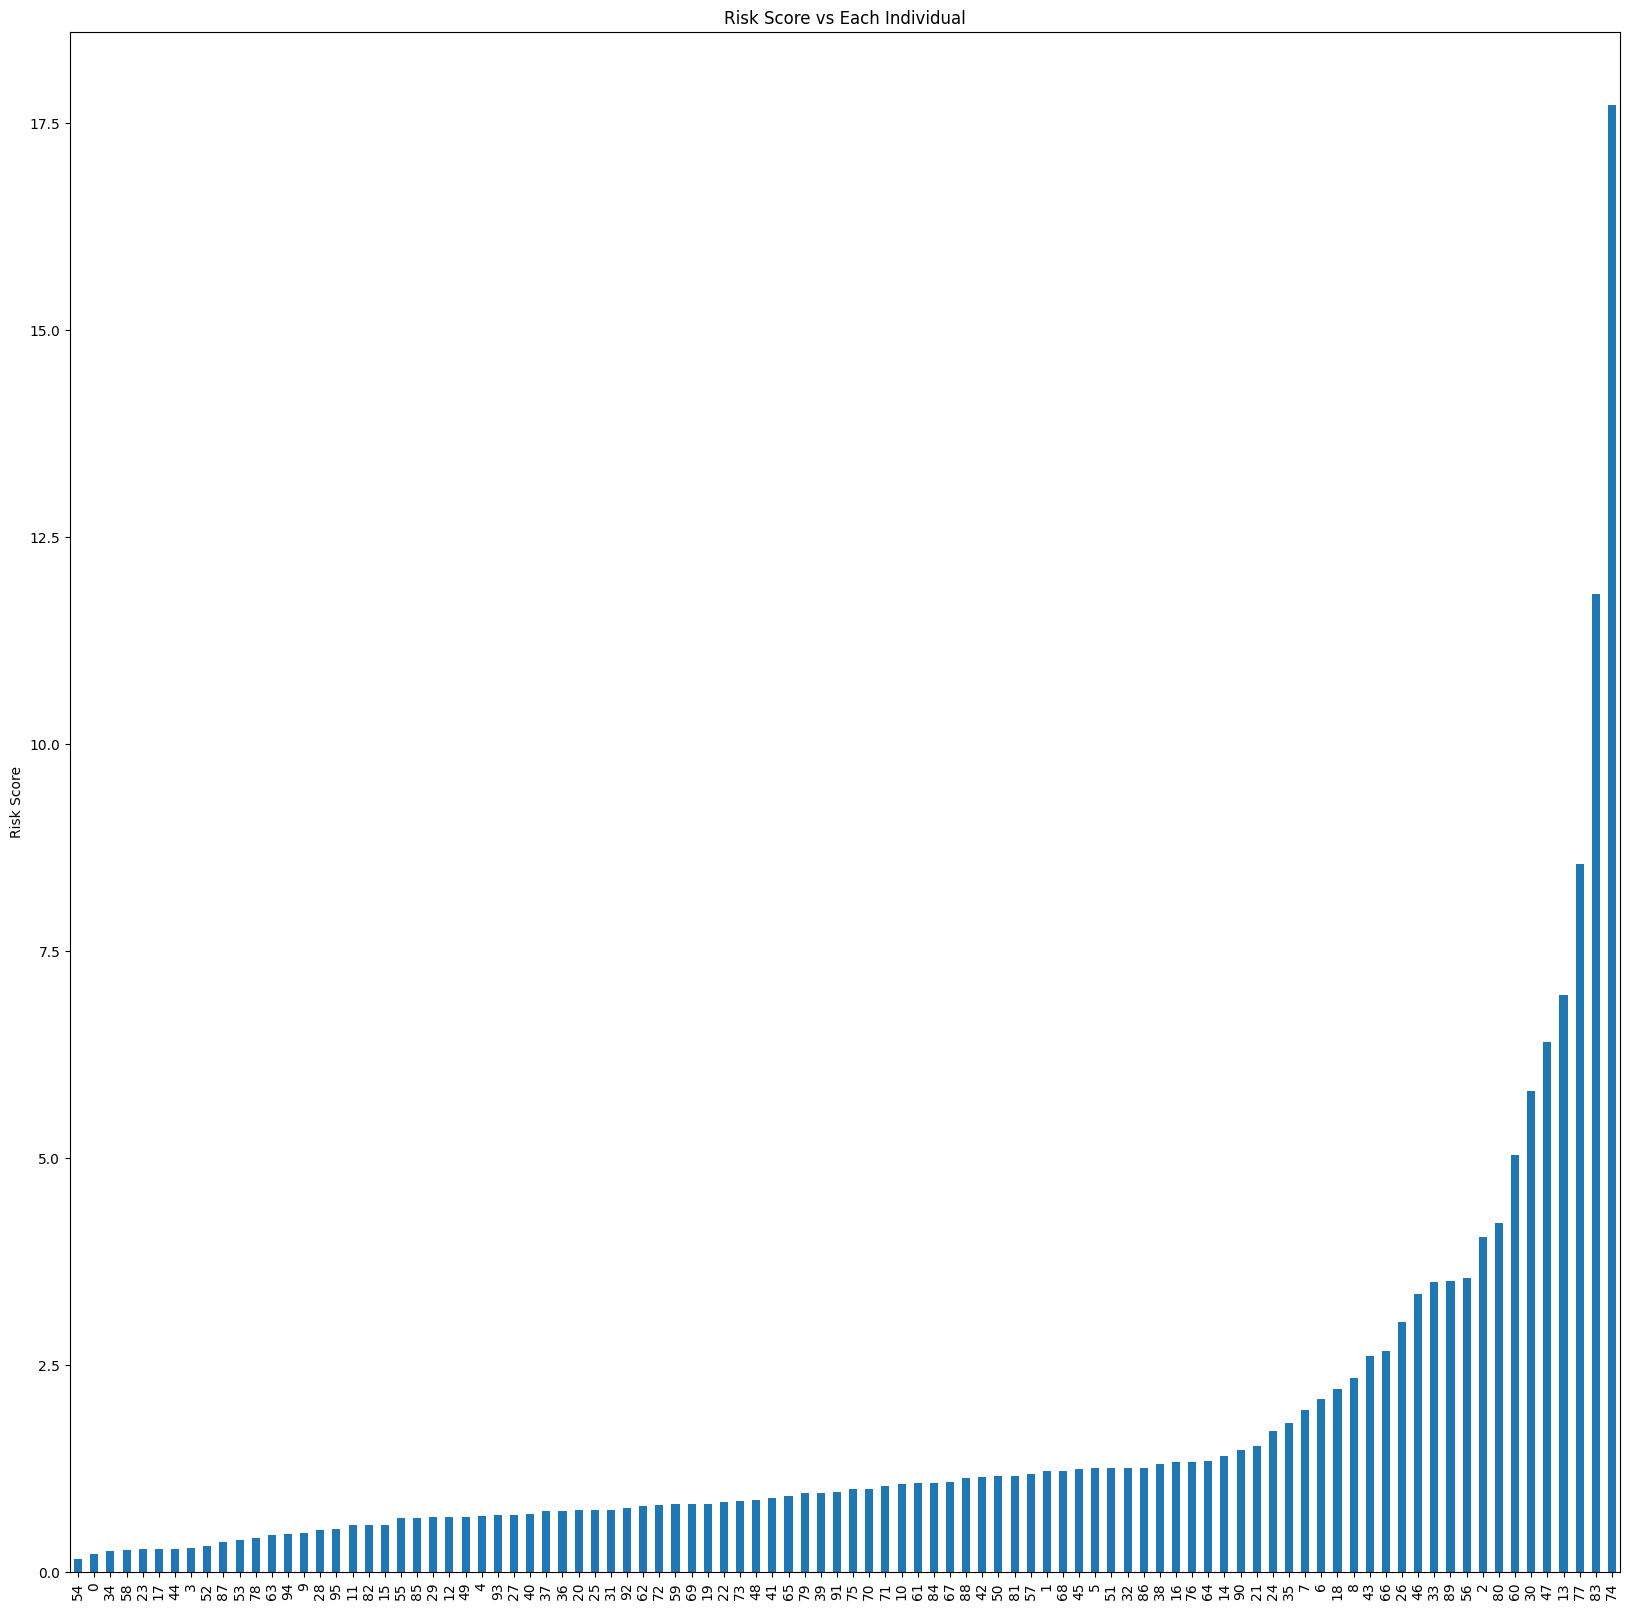

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize= (20,20))
sorted_risk_scores = test_predictions.sort_values()
plt.savefig("/content/drive/MyDrive/1:1_Shriya_Wagholikar/Results/experiment_1/risk_score_exp1.png")
sorted_risk_scores.plot.bar(ylabel = "Risk Score", title = "Risk Score vs Each Individual")

Hazard Ratio Plot

In [18]:
hazard_ratios = model.hazard_ratios_
hazard_ratios_sort = hazard_ratios.sort_values()

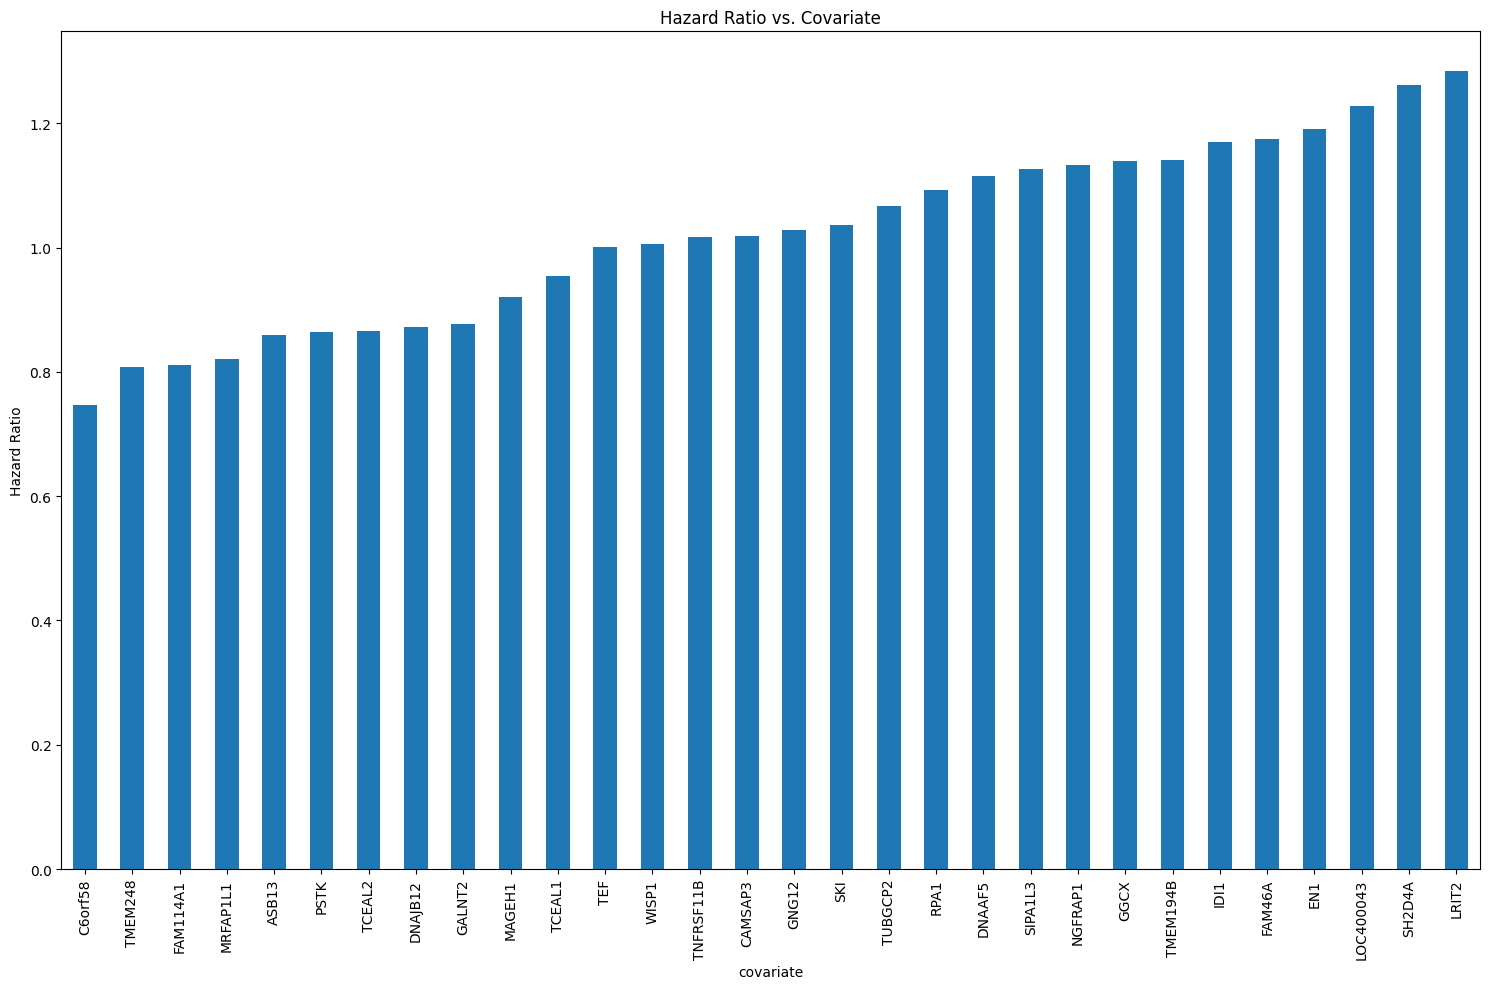

In [19]:
#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))  # Adjust width and height as needed
# Create the bar plot
hazard_ratios_sort.plot.bar(ylabel="Hazard Ratio", title="Hazard Ratio vs. Covariate")
#hazard_ratios_sort.plot.bar(ylabel="Hazard Ratio", title="Hazard Ratio vs. Covariate", log=True) # use this to see y small scale y labels
# Show the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/1:1_Shriya_Wagholikar/Results/experiment_1/hazard_ratio_exp1.png")
plt.show()


Plot Time vs Survival Probability vs Reoccurence Time

In [20]:
#calculate survival probabilities
# survival probabilities
survival_probabilities_original = model.predict_survival_function(test_data, times = test_data["Disease Free (Months)"].to_list())
survival_probabilities = survival_probabilities_original.sort_index()
survival_probabilities.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0.03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2.69,0.998365,0.990674,0.969184,0.997777,0.994798,0.990391,0.983936,0.984989,0.981998,0.996383,...,0.990333,0.997262,0.991280,0.973172,0.988709,0.992562,0.994108,0.994752,0.996485,0.996027
2.96,0.997920,0.988146,0.960947,0.997172,0.993384,0.987788,0.979601,0.980936,0.977146,0.995400,...,0.987714,0.996517,0.988916,0.965983,0.985652,0.990544,0.992508,0.993326,0.995529,0.994946


In [21]:
#create a disease mapper (dict)
#Creating a mapper to identify patients who are not censored and plot the graph only for those who have experienced recurrence
DISEASE_MAPPER = {}
# map the disease free or recurrent status
for patient_id_, status in enumerate(test_data["DFS_STATUS_ENCODED"]):
    DISEASE_MAPPER[str(patient_id_)] = status
print(DISEASE_MAPPER)

{'0': 1.0, '1': 0.0, '2': 1.0, '3': 0.0, '4': 0.0, '5': 0.0, '6': 0.0, '7': 1.0, '8': 1.0, '9': 1.0, '10': 1.0, '11': 0.0, '12': 0.0, '13': 1.0, '14': 0.0, '15': 1.0, '16': 0.0, '17': 0.0, '18': 0.0, '19': 1.0, '20': 0.0, '21': 0.0, '22': 0.0, '23': 0.0, '24': 1.0, '25': 1.0, '26': 1.0, '27': 1.0, '28': 0.0, '29': 0.0, '30': 1.0, '31': 0.0, '32': 1.0, '33': 1.0, '34': 0.0, '35': 1.0, '36': 0.0, '37': 0.0, '38': 0.0, '39': 0.0, '40': 0.0, '41': 1.0, '42': 0.0, '43': 0.0, '44': 0.0, '45': 0.0, '46': 1.0, '47': 1.0, '48': 1.0, '49': 0.0, '50': 0.0, '51': 1.0, '52': 0.0, '53': 0.0, '54': 0.0, '55': 0.0, '56': 0.0, '57': 0.0, '58': 0.0, '59': 0.0, '60': 1.0, '61': 0.0, '62': 0.0, '63': 0.0, '64': 0.0, '65': 0.0, '66': 0.0, '67': 0.0, '68': 0.0, '69': 1.0, '70': 1.0, '71': 0.0, '72': 0.0, '73': 1.0, '74': 0.0, '75': 0.0, '76': 0.0, '77': 0.0, '78': 0.0, '79': 0.0, '80': 0.0, '81': 0.0, '82': 0.0, '83': 1.0, '84': 0.0, '85': 1.0, '86': 1.0, '87': 1.0, '88': 0.0, '89': 1.0, '90': 0.0, '91': 0.

In [22]:
#Functions
import random
import numpy as np
import matplotlib.colors as mcolors
def generate_random_colors(n):
    # Get a list of all matplotlib color names
    color_names = list(mcolors.CSS4_COLORS.keys())
    # Check if the requested number of colors is greater than the available colors
    if n > len(color_names):
        raise ValueError(f"Requested number of colors exceeds available colors ({len(color_names)}).")
    # Select n random colors
    random_colors = random.sample(color_names, n)
    return random_colors

def generate_interpolation(id, index, intervals):
    time_occured = test_data["Disease Free (Months)"].to_list()
    intersection = np.interp(time_occured[index], intervals, survival_probabilities[id])
    return intersection

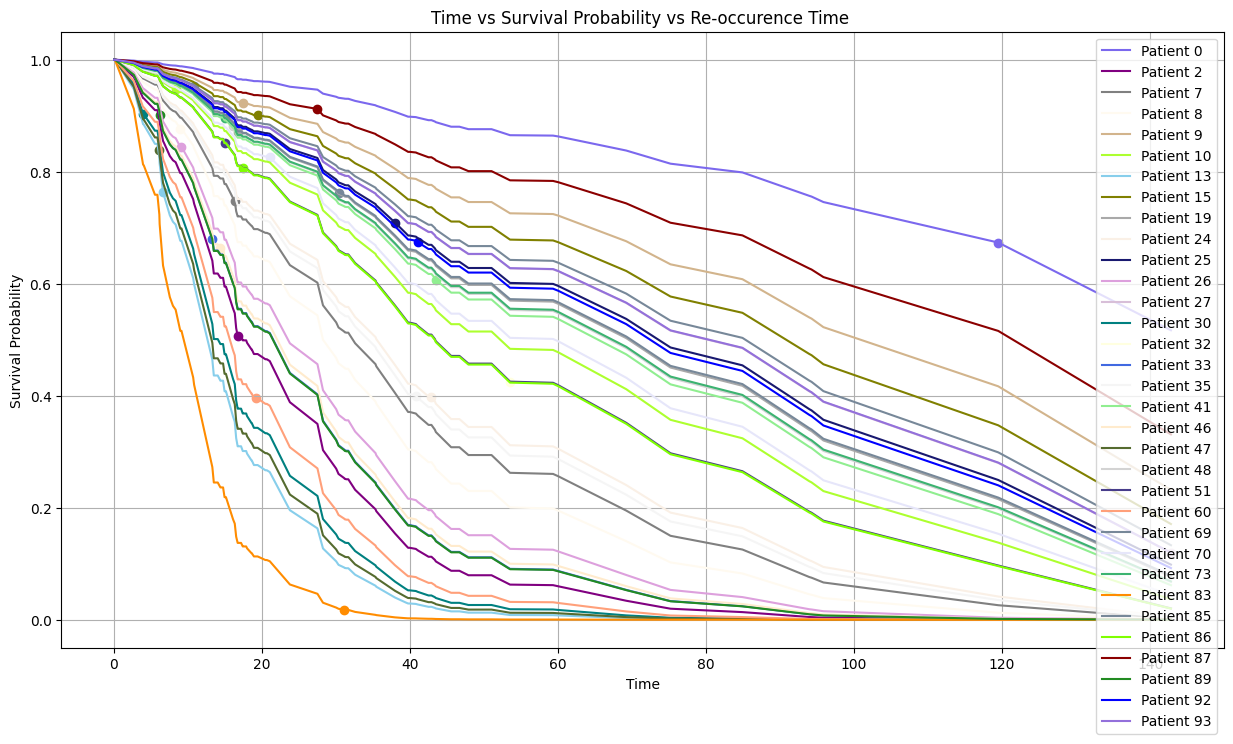

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# patients
patients_id = list(survival_probabilities.columns)
time_intervals = list(survival_probabilities.index)
color_palatte = generate_random_colors(len(patients_id))
time_occured = test_data["Disease Free (Months)"].to_list()
plt.figure(figsize = (15,8))
for index, id in enumerate(patients_id):
    if int(DISEASE_MAPPER[str(id)]) == 0: #identifying patients who are not censored and plot the graph only for those who have experienced recurrence.
        continue
    plt.plot(time_intervals, survival_probabilities[id].to_list(), label = f"Patient {id}", color = color_palatte[index])
    plt.scatter(x = time_occured[index], y = generate_interpolation(id, index, time_intervals), color = color_palatte[index])
plt.legend(loc = "best")
plt.grid(True)
plt.xlabel("Time")
plt.ylabel('Survival Probability')
plt.title("Time vs Survival Probability vs Re-occurence Time ")
plt.savefig("/content/drive/MyDrive/1:1_Shriya_Wagholikar/Results/experiment_1/time_survival_exp1.png")
plt.show()

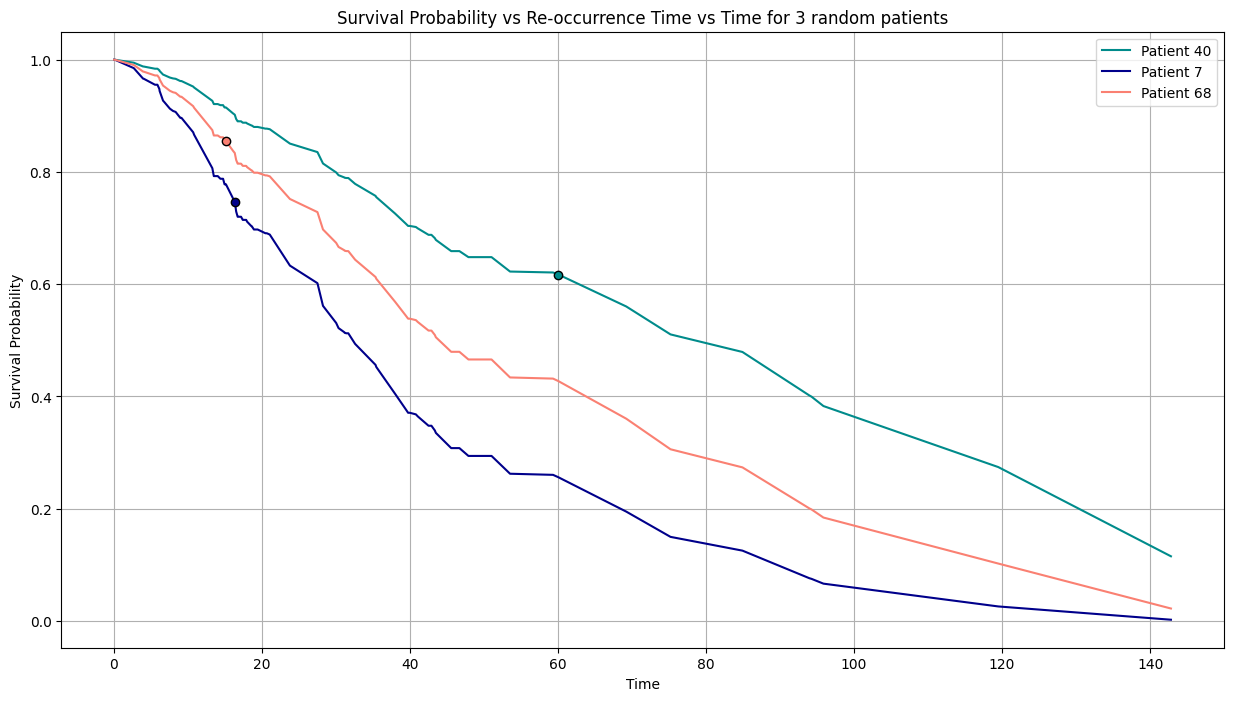

In [24]:
# Get patient IDs and time intervals
patients_id = list(survival_probabilities.columns)
time_intervals = list(survival_probabilities.index)
# Select 3 random patients
selected_patients = random.sample(patients_id, 3)
color_palette = generate_random_colors(len(selected_patients))
# Get the time occurred values from the test data
time_occured = test_data["Disease Free (Months)"].to_list()
# Create the plot
plt.figure(figsize=(15, 8))
for index, patient_id in enumerate(selected_patients):
    plt.plot(time_intervals, survival_probabilities[patient_id].to_list(),
             label=f"Patient {patient_id}", color=color_palette[index])
    # Plot dots on top of lines
    patient_index = patients_id.index(patient_id)
    plt.scatter(x=time_occured[patient_index],
                y=generate_interpolation(patient_id, patient_index, time_intervals),
                color=color_palette[index],edgecolor='black',zorder=5)
plt.legend(loc="best")
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Survival Probability vs Re-occurrence Time vs Time for 3 random patients")
plt.show()